## Pemodelan pada Data Panel

In [101]:
import pandas as pd

data = pd.read_csv('data/34_years_world_export_import_dataset.csv')
data

,Partner Name,Year,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Aruba,1988,3.498100e+03,3.284900e+02,100.0,100,NaN,NaN,NaN,2.80,...,1152.0,63.54,22.74,70.32,31.61,352.69,0.0,2.186000e+03,3.128020e+03,0.00
1,Afghanistan,1988,2.130304e+05,5.445952e+04,100.0,100,NaN,NaN,NaN,0.88,...,4142.0,69.41,15.64,72.45,40.51,2029.66,0.0,7.843691e+04,9.419150e+04,0.00
2,Angola,1988,3.755279e+05,3.707028e+05,100.0,100,NaN,NaN,NaN,2.02,...,5438.0,76.00,16.27,41.55,24.80,451.15,0.0,7.277420e+05,9.214815e+05,0.00
3,Anguila,1988,3.669800e+02,4.000000e+00,100.0,100,NaN,NaN,NaN,3.71,...,322.0,66.15,22.05,78.79,36.36,100.00,0.0,9.400000e+01,5.830000e+02,0.00
4,Albania,1988,3.010356e+04,4.770930e+04,100.0,100,NaN,NaN,NaN,1.84,...,5684.0,66.87,19.19,57.93,48.52,3000.00,0.0,3.790409e+04,1.011959e+05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,Latin America & Caribbean,2021,1.330557e+09,1.310305e+09,100.0,100,NaN,NaN,NaN,3.84,...,1509731.0,67.97,25.91,0.39,5.08,3000.00,0.0,4.193397e+08,1.346740e+09,1632.05
8092,Middle East & North Africa,2021,1.196712e+09,1.088471e+09,100.0,100,NaN,NaN,NaN,4.63,...,1507304.0,67.98,25.91,0.46,5.92,3000.00,0.0,5.809079e+08,1.117309e+09,0.00
8093,North America,2021,3.823319e+09,2.219849e+09,100.0,100,NaN,NaN,NaN,6.45,...,1533357.0,67.86,26.04,0.59,7.58,3000.00,0.0,6.433132e+08,2.055953e+09,23691.96
8094,South Asia,2021,6.991380e+08,4.723832e+08,100.0,100,NaN,NaN,NaN,5.09,...,1508290.0,67.94,26.02,0.68,8.71,3000.00,0.0,8.497724e+07,5.123190e+08,0.05


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Partner Name                             8096 non-null   object 
 1   Year                                     8096 non-null   int64  
 2   Export (US$ Thousand)                    8096 non-null   float64
 3   Import (US$ Thousand)                    8096 non-null   float64
 4   Export Product Share (%)                 8076 non-null   float64
 5   Import Product Share (%)                 8096 non-null   int64  
 6   Revealed comparative advantage           4712 non-null   float64
 7   World Growth (%)                         4410 non-null   float64
 8   Country Growth (%)                       4410 non-null   float64
 9   AHS Simple Average (%)                   8080 non-null   float64
 10  AHS Weighted Average (%)                 8080 no

In [103]:
data.isnull().sum()

Partner Name                                  0
Year                                          0
Export (US$ Thousand)                         0
Import (US$ Thousand)                         0
Export Product Share (%)                     20
Import Product Share (%)                      0
Revealed comparative advantage             3384
World Growth (%)                           3686
Country Growth (%)                         3686
AHS Simple Average (%)                       16
AHS Weighted Average (%)                     16
AHS Total Tariff Lines                       16
AHS Dutiable Tariff Lines Share (%)          16
AHS Duty Free Tariff Lines Share (%)         16
AHS Specific Tariff Lines Share (%)          16
AHS AVE Tariff Lines Share (%)               16
AHS MaxRate (%)                              16
AHS MinRate (%)                              16
AHS SpecificDuty Imports (US$ Thousand)      15
AHS Dutiable Imports (US$ Thousand)          15
AHS Duty Free Imports (US$ Thousand)    

In [104]:
data = data.drop(columns=['Revealed comparative advantage', 'World Growth (%)', 'Country Growth (%)'])
data

,Partner Name,Year,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,AHS Dutiable Tariff Lines Share (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Aruba,1988,3.498100e+03,3.284900e+02,100.0,100,2.80,2.92,155.0,18.06,...,1152.0,63.54,22.74,70.32,31.61,352.69,0.0,2.186000e+03,3.128020e+03,0.00
1,Afghanistan,1988,2.130304e+05,5.445952e+04,100.0,100,0.88,1.83,548.0,8.76,...,4142.0,69.41,15.64,72.45,40.51,2029.66,0.0,7.843691e+04,9.419150e+04,0.00
2,Angola,1988,3.755279e+05,3.707028e+05,100.0,100,2.02,3.89,633.0,25.43,...,5438.0,76.00,16.27,41.55,24.80,451.15,0.0,7.277420e+05,9.214815e+05,0.00
3,Anguila,1988,3.669800e+02,4.000000e+00,100.0,100,3.71,1.09,33.0,6.06,...,322.0,66.15,22.05,78.79,36.36,100.00,0.0,9.400000e+01,5.830000e+02,0.00
4,Albania,1988,3.010356e+04,4.770930e+04,100.0,100,1.84,2.38,744.0,20.83,...,5684.0,66.87,19.19,57.93,48.52,3000.00,0.0,3.790409e+04,1.011959e+05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,Latin America & Caribbean,2021,1.330557e+09,1.310305e+09,100.0,100,3.84,6.71,1688963.0,30.36,...,1509731.0,67.97,25.91,0.39,5.08,3000.00,0.0,4.193397e+08,1.346740e+09,1632.05
8092,Middle East & North Africa,2021,1.196712e+09,1.088471e+09,100.0,100,4.63,2.14,1445742.0,38.97,...,1507304.0,67.98,25.91,0.46,5.92,3000.00,0.0,5.809079e+08,1.117309e+09,0.00
8093,North America,2021,3.823319e+09,2.219849e+09,100.0,100,6.45,4.63,1144964.0,50.59,...,1533357.0,67.86,26.04,0.59,7.58,3000.00,0.0,6.433132e+08,2.055953e+09,23691.96
8094,South Asia,2021,6.991380e+08,4.723832e+08,100.0,100,5.09,5.96,969270.0,46.74,...,1508290.0,67.94,26.02,0.68,8.71,3000.00,0.0,8.497724e+07,5.123190e+08,0.05


In [105]:
data = data.apply(lambda x: x.astype(float) if x.name != 'Partner Name' else x)
data = data.apply(lambda x: x.fillna(x.mean()) if x.isnull().any() else x)
data

,Partner Name,Year,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,AHS Dutiable Tariff Lines Share (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Aruba,1988.0,3.498100e+03,3.284900e+02,100.0,100.0,2.80,2.92,155.0,18.06,...,1152.0,63.54,22.74,70.32,31.61,352.69,0.0,2.186000e+03,3.128020e+03,0.00
1,Afghanistan,1988.0,2.130304e+05,5.445952e+04,100.0,100.0,0.88,1.83,548.0,8.76,...,4142.0,69.41,15.64,72.45,40.51,2029.66,0.0,7.843691e+04,9.419150e+04,0.00
2,Angola,1988.0,3.755279e+05,3.707028e+05,100.0,100.0,2.02,3.89,633.0,25.43,...,5438.0,76.00,16.27,41.55,24.80,451.15,0.0,7.277420e+05,9.214815e+05,0.00
3,Anguila,1988.0,3.669800e+02,4.000000e+00,100.0,100.0,3.71,1.09,33.0,6.06,...,322.0,66.15,22.05,78.79,36.36,100.00,0.0,9.400000e+01,5.830000e+02,0.00
4,Albania,1988.0,3.010356e+04,4.770930e+04,100.0,100.0,1.84,2.38,744.0,20.83,...,5684.0,66.87,19.19,57.93,48.52,3000.00,0.0,3.790409e+04,1.011959e+05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,Latin America & Caribbean,2021.0,1.330557e+09,1.310305e+09,100.0,100.0,3.84,6.71,1688963.0,30.36,...,1509731.0,67.97,25.91,0.39,5.08,3000.00,0.0,4.193397e+08,1.346740e+09,1632.05
8092,Middle East & North Africa,2021.0,1.196712e+09,1.088471e+09,100.0,100.0,4.63,2.14,1445742.0,38.97,...,1507304.0,67.98,25.91,0.46,5.92,3000.00,0.0,5.809079e+08,1.117309e+09,0.00
8093,North America,2021.0,3.823319e+09,2.219849e+09,100.0,100.0,6.45,4.63,1144964.0,50.59,...,1533357.0,67.86,26.04,0.59,7.58,3000.00,0.0,6.433132e+08,2.055953e+09,23691.96
8094,South Asia,2021.0,6.991380e+08,4.723832e+08,100.0,100.0,5.09,5.96,969270.0,46.74,...,1508290.0,67.94,26.02,0.68,8.71,3000.00,0.0,8.497724e+07,5.123190e+08,0.05


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Partner Name                             8096 non-null   object 
 1   Year                                     8096 non-null   float64
 2   Export (US$ Thousand)                    8096 non-null   float64
 3   Import (US$ Thousand)                    8096 non-null   float64
 4   Export Product Share (%)                 8096 non-null   float64
 5   Import Product Share (%)                 8096 non-null   float64
 6   AHS Simple Average (%)                   8096 non-null   float64
 7   AHS Weighted Average (%)                 8096 non-null   float64
 8   AHS Total Tariff Lines                   8096 non-null   float64
 9   AHS Dutiable Tariff Lines Share (%)      8096 non-null   float64
 10  AHS Duty Free Tariff Lines Share (%)     8096 no

In [107]:
#Mengimpor Library
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects

#Persiapan Data Panel 
# Membuat DataFrame
df = pd.DataFrame(data)
df

,Partner Name,Year,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Total Tariff Lines,AHS Dutiable Tariff Lines Share (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Aruba,1988.0,3.498100e+03,3.284900e+02,100.0,100.0,2.80,2.92,155.0,18.06,...,1152.0,63.54,22.74,70.32,31.61,352.69,0.0,2.186000e+03,3.128020e+03,0.00
1,Afghanistan,1988.0,2.130304e+05,5.445952e+04,100.0,100.0,0.88,1.83,548.0,8.76,...,4142.0,69.41,15.64,72.45,40.51,2029.66,0.0,7.843691e+04,9.419150e+04,0.00
2,Angola,1988.0,3.755279e+05,3.707028e+05,100.0,100.0,2.02,3.89,633.0,25.43,...,5438.0,76.00,16.27,41.55,24.80,451.15,0.0,7.277420e+05,9.214815e+05,0.00
3,Anguila,1988.0,3.669800e+02,4.000000e+00,100.0,100.0,3.71,1.09,33.0,6.06,...,322.0,66.15,22.05,78.79,36.36,100.00,0.0,9.400000e+01,5.830000e+02,0.00
4,Albania,1988.0,3.010356e+04,4.770930e+04,100.0,100.0,1.84,2.38,744.0,20.83,...,5684.0,66.87,19.19,57.93,48.52,3000.00,0.0,3.790409e+04,1.011959e+05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,Latin America & Caribbean,2021.0,1.330557e+09,1.310305e+09,100.0,100.0,3.84,6.71,1688963.0,30.36,...,1509731.0,67.97,25.91,0.39,5.08,3000.00,0.0,4.193397e+08,1.346740e+09,1632.05
8092,Middle East & North Africa,2021.0,1.196712e+09,1.088471e+09,100.0,100.0,4.63,2.14,1445742.0,38.97,...,1507304.0,67.98,25.91,0.46,5.92,3000.00,0.0,5.809079e+08,1.117309e+09,0.00
8093,North America,2021.0,3.823319e+09,2.219849e+09,100.0,100.0,6.45,4.63,1144964.0,50.59,...,1533357.0,67.86,26.04,0.59,7.58,3000.00,0.0,6.433132e+08,2.055953e+09,23691.96
8094,South Asia,2021.0,6.991380e+08,4.723832e+08,100.0,100.0,5.09,5.96,969270.0,46.74,...,1508290.0,67.94,26.02,0.68,8.71,3000.00,0.0,8.497724e+07,5.123190e+08,0.05


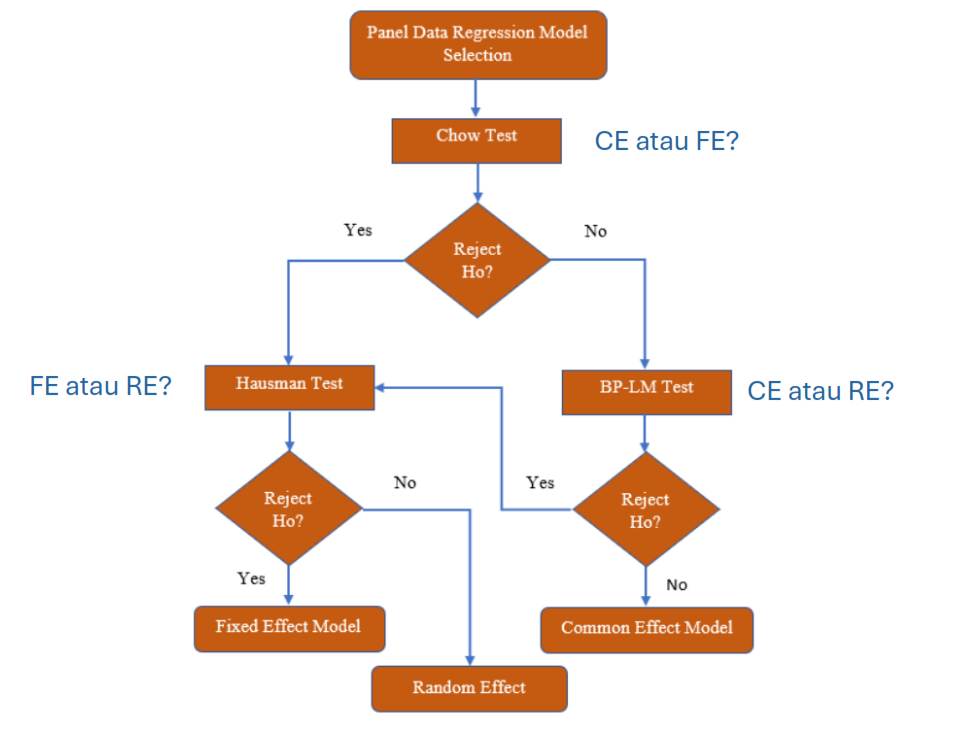

## Chow Test
Chow Test pada dasarnya menguji apakah ada perubahan struktural dalam hubungan antar variabel di dua periode.

Jika menolak H0 (ada perbedaan), maka dilanjut ke Hausman Test.

Jika menerima H0 (tidak ada perbedaan), maka lanjut ke BP-LM Test

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import f

# Pisahkan data berdasarkan tahun tertentu untuk Chow Test
split_year = 2000

# Misalkan kita ingin menguji regresi antara variabel 'Export (US$ Thousand)' (sebagai y)
# dengan beberapa variabel independen lainnya
df1 = df[df['Year'] <= split_year]
df2 = df[df['Year'] > split_year]

# Tentukan variabel independen (X) dan dependen (y)
X1 = df1[['Import (US$ Thousand)', 'AHS Simple Average (%)', 'AHS Weighted Average (%)', 
          'MFN Dutiable Tariff Lines Share (%)']]
Y1 = df1['Export (US$ Thousand)']
X2 = df2[['Import (US$ Thousand)', 'AHS Simple Average (%)', 'AHS Weighted Average (%)', 
          'MFN Dutiable Tariff Lines Share (%)']]
Y2 = df2['Export (US$ Thousand)']

# Tambahkan konstanta ke model regresi
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

# Estimasi model regresi untuk setiap subset data
model1 = sm.OLS(Y1, X1).fit()
model2 = sm.OLS(Y2, X2).fit()

# Gabungkan data untuk model keseluruhan
X_full = sm.add_constant(df[['Import (US$ Thousand)', 'AHS Simple Average (%)', 'AHS Weighted Average (%)', 
                             'MFN Dutiable Tariff Lines Share (%)']])
Y_full = df['Export (US$ Thousand)']
model_full = sm.OLS(Y_full, X_full).fit()

# Dapatkan residual sum of squares (RSS) untuk masing-masing model
RSS1 = model1.ssr
RSS2 = model2.ssr
RSS_full = model_full.ssr

# Jumlah observasi dan jumlah parameter
n1 = len(Y1)
n2 = len(Y2)
k = X1.shape[1]  # jumlah parameter (termasuk konstanta)

# Hitung nilai statistik F
numerator = (RSS_full - (RSS1 + RSS2)) / k
denominator = (RSS1 + RSS2) / (n1 + n2 - 2 * k)
F_stat = numerator / denominator

# Hitung p-value
p_value = 1 - f.cdf(F_stat, k, n1 + n2 - 2 * k)

print("Nilai F-statistik:", F_stat)
print("P-value:", p_value)

# Hasil
if p_value < 0.05:
    print("Hipotesis Alternatif (H1) / Tolak H0: Terdapat perbedaan signifikan antara dua periode (tahun <= {} dan tahun > {})".format(split_year, split_year))
else:
    print("Hipotesis Nol (H0) / Terima H0: Tidak terdapat perbedaan signifikan antara dua periode (tahun <= {} dan tahun > {})".format(split_year, split_year))


Nilai F-statistik: 38.61691728895026
P-value: 1.1102230246251565e-16
Hipotesis Alternatif (H1) / Tolak H0: Terdapat perbedaan signifikan antara dua periode (tahun <= 2000 dan tahun > 2000)


## Fixed Effect vs Random Effect
Karena hasil Chow Test menunjukkan penolakan terhadap H0, maka dilanjutkan Hausman Test.

Hausman Test dilakukan untuk menentukan apakah model regresi terbaik adalah model efek tetap/fixed effects (pvalue < 0.05)  atau efek acak/random effects (pvalue > 0.05) pada data panel.

In [109]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects

# Mengatur data dalam format panel, pastikan df adalah dataframe Anda
df = df.set_index(['Partner Name', 'Year'])

# Menyiapkan variabel independen (X) dan dependen (Y)
X = df[['Import (US$ Thousand)', 'AHS Simple Average (%)', 'AHS Weighted Average (%)', 'MFN Dutiable Tariff Lines Share (%)']]
Y = df['Export (US$ Thousand)']

# Menambahkan konstanta (intercept)
X = sm.add_constant(X)

### Model Fixed Effects

In [110]:
model_fe = PanelOLS(Y, X, entity_effects=True)
fe_results = model_fe.fit()
print(fe_results)


                            PanelOLS Estimation Summary                            
Dep. Variable:     Export (US$ Thousand)   R-squared:                        0.9851
Estimator:                      PanelOLS   R-squared (Between):              0.9899
No. Observations:                   8096   R-squared (Within):               0.9851
Date:                   Tue, Nov 05 2024   R-squared (Overall):              0.9885
Time:                           10:14:11   Log-likelihood                -1.573e+05
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                    1.29e+05
Entities:                            265   P-value                           0.0000
Avg Obs:                          30.551   Distribution:                  F(4,7827)
Min Obs:                          3.0000                                           
Max Obs:                          34.000   F-statistic (robust):           1

### Model Random Effects

In [111]:
model_re = RandomEffects(Y, X)
re_results = model_re.fit()
print(re_results)

                          RandomEffects Estimation Summary                         
Dep. Variable:     Export (US$ Thousand)   R-squared:                        0.9853
Estimator:                 RandomEffects   R-squared (Between):              0.9900
No. Observations:                   8096   R-squared (Within):               0.9851
Date:                   Tue, Nov 05 2024   R-squared (Overall):              0.9885
Time:                           10:14:11   Log-likelihood                -1.574e+05
Cov. Estimator:               Unadjusted                                           
                                           F-statistic:                   1.356e+05
Entities:                            265   P-value                           0.0000
Avg Obs:                          30.551   Distribution:                  F(4,8091)
Min Obs:                          3.0000                                           
Max Obs:                          34.000   F-statistic (robust):          1.

### Hausman Test

In [112]:
#Uji Hausman (Fixed Effects vs Random Effects)
from linearmodels.panel import compare
#Membandingkan model Fixed Effects dan Random Effects dengan uji Hausman
comparison = compare({"Fixed Effects": fe_results, "Random Effects":re_results})
print(comparison)

                                      Model Comparison                                     
                                                    Fixed Effects            Random Effects
-------------------------------------------------------------------------------------------
Dep. Variable                               Export (US$ Thousand)     Export (US$ Thousand)
Estimator                                                PanelOLS             RandomEffects
No. Observations                                             8096                      8096
Cov. Est.                                              Unadjusted                Unadjusted
R-squared                                                  0.9851                    0.9853
R-Squared (Within)                                         0.9851                    0.9851
R-Squared (Between)                                        0.9899                    0.9900
R-Squared (Overall)                                        0.9885               